# Q.1

In [1]:
import tensorflow as tf
import keras

import warnings
warnings.filterwarnings('ignore')

print(f"Tensorflow Version:{tf.__version__}")
print(f"Keras Version:{keras.__version__}")

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Tensorflow Version:2.13.0
Keras Version:2.13.1


# Q.2

In [2]:
import pandas as pd

df=pd.read_csv('wine.csv')
df.shape

(1599, 12)

# Q.3

In [3]:
#check for null values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
#Identifying categorical variables
categorical_col=df.select_dtypes(include=['object','category'])
categorical_col_names=list(categorical_col.columns) #including the quality column
print(categorical_col_names)
print(df[categorical_col_names].value_counts())

['quality']
quality
good       855
bad        744
dtype: int64


In [5]:
#Encoding Categorical columns
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
df[categorical_col_names[0]]=label_encoder.fit_transform(df[categorical_col_names[0]])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


# Q.4

In [6]:
y=df.pop('quality')
x=df

# Q.5

In [7]:
#Performing train-test split and dividing data into training, validation, and test datasets.

from sklearn.model_selection import train_test_split

#split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#split the training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print("Training set size:", x_train.shape[0])
print("Validation set size:", x_val.shape[0])
print("Test set size:", x_test.shape[0])

Training set size: 1023
Validation set size: 256
Test set size: 320


# Q.6

In [8]:
#Perform scaling on the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

# Q.7 and Q.8

In [9]:
#creating two hidden layers, output layer and Sequential Model

input_shape = (x_train_scaled.shape[1],)

model = keras.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=input_shape))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Q.9

In [10]:
#Printing Model Architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Q.10 and Q.11

In [11]:
#Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].
#Compile the model with the specified loss function, optimizer, and metrics.

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Q.12

In [15]:
#Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.

model.fit(x_train_scaled, y_train, batch_size=32, epochs=30, validation_data=(x_val_scaled, y_val))

Epoch 1/30
32/32 [==============================] - 1s 8ms/step - loss: 0.6434 - accuracy: 0.6520 - val_loss: 0.5942 - val_accuracy: 0.7227
Epoch 2/30
32/32 [==============================] - 0s 2ms/step - loss: 0.5551 - accuracy: 0.7419 - val_loss: 0.5572 - val_accuracy: 0.7461
Epoch 3/30
32/32 [==============================] - 0s 2ms/step - loss: 0.5233 - accuracy: 0.7546 - val_loss: 0.5477 - val_accuracy: 0.7656
Epoch 4/30
32/32 [==============================] - 0s 2ms/step - loss: 0.5094 - accuracy: 0.7625 - val_loss: 0.5472 - val_accuracy: 0.7656
Epoch 5/30
32/32 [==============================] - 0s 3ms/step - loss: 0.4987 - accuracy: 0.7605 - val_loss: 0.5419 - val_accuracy: 0.7773
Epoch 6/30
32/32 [==============================] - 0s 2ms/step - loss: 0.4899 - accuracy: 0.7615 - val_loss: 0.5404 - val_accuracy: 0.7695
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.7595 - val_loss: 0.5403 - val_accuracy: 0.7734
Epoch 8/30
32/32 [==

# Q.13

In [16]:
#Get the model parameters(weights and biases)

import numpy as np

#save the trained weights
model.save_weights('wine_weights.h5')

#load the trained weights
model.load_weights('wine_weights.h5')

#obtain the parameters for each layer
layer_parameters = []
for layer in model.layers:
    layer_parameters.append(layer.get_weights())

#print the parameters for each layer
for i, layer in enumerate(layer_parameters):
    weights = layer[0]
    biases = layer[1]
    print(f"Layer {i+1} weights shape: {np.shape(weights)}")
    print(f"Layer {i+1} biases shape: {np.shape(biases)}")

Layer 1 weights shape: (11, 64)
Layer 1 biases shape: (64,)
Layer 2 weights shape: (64, 32)
Layer 2 biases shape: (32,)
Layer 3 weights shape: (32, 1)
Layer 3 biases shape: (1,)


# Q.14

In [17]:
#Store the model's training history as a Pandas DataFrame.
history = pd.DataFrame(model.history.history)
history

,loss,accuracy,val_loss,val_accuracy
0,0.643383,0.652004,0.594179,0.722656
1,0.555133,0.741935,0.557152,0.746094
2,0.523317,0.754643,0.547724,0.765625
3,0.509356,0.762463,0.547191,0.765625
4,0.498681,0.760508,0.541882,0.777344
5,0.489881,0.761486,0.540374,0.769531
6,0.485048,0.759531,0.540308,0.773438
7,0.479373,0.758553,0.540727,0.769531
8,0.474043,0.770283,0.535215,0.769531
9,0.468948,0.767351,0.536018,0.781250


# Q.15

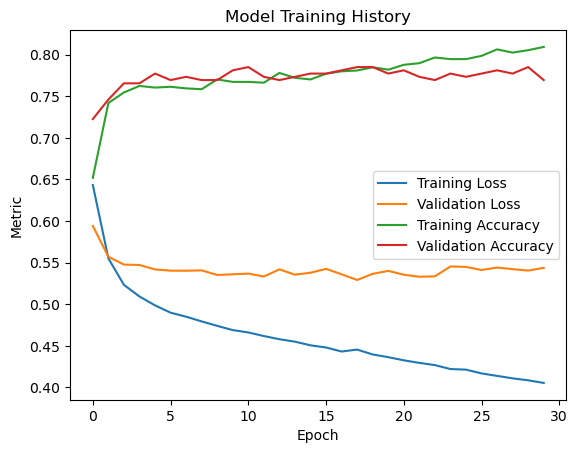

In [18]:
#Plot the model's training history.

import matplotlib.pyplot as plt

plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Model Training History')
plt.legend()
plt.show()

# Q.16

In [19]:
#Evaluate the model's performance using the test data.

loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

10/10 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.7656
Test Loss: 0.47427600622177124
Test Accuracy: 0.765625
